In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df=pd.read_excel(r"C:\Users\rprin\OneDrive\Desktop\Lead Time Dataset.xlsx")
df

,distance_km,lead_time_days,transport_mode,region,priority,carrier_type
0,560.4,7.95,Truck,East,Normal,Own Fleet
1,1439.7,18.87,Rail,South,Critical,3PL
2,1076.8,14.28,Truck,West,High,Contractor
3,817.6,11.45,Truck,North,Normal,3PL
4,593.5,7.64,Rail,East,High,Own Fleet
...,...,...,...,...,...,...
216,1360.3,16.84,Rail,West,Critical,Contractor
217,1108.1,14.38,Rail,East,High,3PL
218,702.4,9.04,Truck,South,Normal,Own Fleet
219,588.2,7.71,Truck,West,Normal,Contractor


In [29]:
df.head()

,distance_km,lead_time_days,transport_mode,region,priority,carrier_type
0,560.4,7.95,Truck,East,Normal,Own Fleet
1,1439.7,18.87,Rail,South,Critical,3PL
2,1076.8,14.28,Truck,West,High,Contractor
3,817.6,11.45,Truck,North,Normal,3PL
4,593.5,7.64,Rail,East,High,Own Fleet


In [30]:
X= df[['distance_km']] # Feature
y= df['lead_time_days'] #Target

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
#fit the model

In [35]:
model.fit(X,y)

LinearRegression()

In [43]:
print("Slope (Coefficient):",model.coef_[0])
print("Intercept:",model.intercept_)

Slope (Coefficient): 0.011627363749275635
Intercept: 1.176381045621092


In [45]:
df['predicted_leadtimedays']=model.predict(X)

In [47]:
#print(df[['distancekm','Leadtimedays','predicted_Leadtimedays']].head())

In [49]:
df

,distance_km,lead_time_days,transport_mode,region,priority,carrier_type,predicted_leadtimedays
0,560.4,7.95,Truck,East,Normal,Own Fleet,7.692356
1,1439.7,18.87,Rail,South,Critical,3PL,17.916297
2,1076.8,14.28,Truck,West,High,Contractor,13.696726
3,817.6,11.45,Truck,North,Normal,3PL,10.682914
4,593.5,7.64,Rail,East,High,Own Fleet,8.077221
...,...,...,...,...,...,...,...
216,1360.3,16.84,Rail,West,Critical,Contractor,16.993084
217,1108.1,14.38,Rail,East,High,3PL,14.060663
218,702.4,9.04,Truck,South,Normal,Own Fleet,9.343441
219,588.2,7.71,Truck,West,Normal,Contractor,8.015596


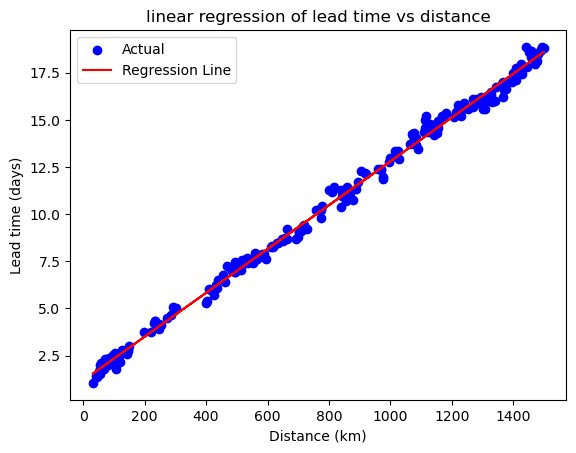

In [57]:
plt.scatter(X,y, color='blue', label='Actual')
plt.plot(X, df['predicted_leadtimedays'], color='red', label='Regression Line')
plt.xlabel("Distance (km)")
plt.ylabel("Lead time (days)")
plt.title('linear regression of lead time vs distance')
plt.legend()
plt.show()

In [65]:
# where r2 is more then you make your model very good
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y, df['predicted_leadtimedays'])
mse = mean_squared_error(y, df['predicted_leadtimedays'])
print("r^2 Score", r2)
print("Mean Squared Error", mse)

SyntaxError: invalid non-printable character U+00A0 (3008347498.py, line 6)

In [75]:
X= df[['distance_km','transport_mode','region','priority','carrier_type']]
y=df['lead_time_days']
X_encoded=pd.get_dummies(X,drop_first=True)

In [77]:
X_encoded

,distance_km,transport_mode_Rail,transport_mode_Truck,region_North,region_South,region_West,priority_High,priority_Normal,carrier_type_Contractor,carrier_type_Own Fleet
0,560.4,False,True,False,False,False,False,True,False,True
1,1439.7,True,False,False,True,False,False,False,False,False
2,1076.8,False,True,False,False,True,True,False,True,False
3,817.6,False,True,True,False,False,False,True,False,False
4,593.5,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
216,1360.3,True,False,False,False,True,False,False,True,False
217,1108.1,True,False,False,False,False,True,False,False,False
218,702.4,False,True,False,True,False,False,True,False,True
219,588.2,False,True,False,False,True,False,True,True,False


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

In [79]:
# Assuming X_encoded and y are already prepared and available:

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [83]:
r2=r2_score(y_test,y_pred)

In [85]:
mse=mean_squared_error(y_test,y_pred)

In [87]:
rmse=np.sqrt(mse)

In [89]:
mae=mean_absolute_error(y_test,y_pred)

In [93]:
print(r2)

0.9968144796089013
